In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Shifting all data from xls format into cleaned up df
team_stats = pd.read_excel("data_files/Lebron_Jordan_Team_Record.xlsx")
team_stats = team_stats.loc[:, ~team_stats.columns.str.startswith("Unnamed")]

team_stats['W/L% without Player'] = round((team_stats['W'] -team_stats['W with Player'] )/ ((team_stats['W'] -team_stats['W with Player'] )+(team_stats['L'] -team_stats['L with Player'])),3)
col_to_move, target_col = "W/L% without Player", "W/L%"
cols = team_stats.columns.tolist()
cols.insert(cols.index(target_col) + 1, cols.pop(cols.index(col_to_move)))
team_stats = team_stats[cols]

lebron_team_stats = team_stats[:22]
jordan_team_stats = team_stats[23:]
team_stats['W/L% without Player'] = team_stats['W/L% without Player'].replace(0, np.nan)
team_stats.head()


,Season,Lg,Team,W,L,W with Player,L with Player,W/L%,W/L% without Player,Finish,SRS,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Playoffs,Coaches,Top WS
0,2024-25,NBA,Los Angeles Lakers,24.0,18.0,22.0,17.0,0.571,0.667,1st of 5,-1.15,97.5,-1.5,113.9,0.5,115.4,2.0,NaN,J. Redick (24-18),A. Davis (5.6)
1,2023-24,NBA,Los Angeles Lakers*,47.0,35.0,41.0,30.0,0.573,0.545,3rd of 5,1.07,100.9,2.4,115.9,0.6,115.3,0.0,Lost W. Conf. 1st Rnd.,D. Ham (47-35),A. Davis (11.8)
2,2022-23,NBA,Los Angeles Lakers*,43.0,39.0,30.0,25.0,0.524,0.481,5th of 5,0.43,101.3,2.2,114.5,-0.3,113.9,-0.9,Lost W. Conf. Finals,D. Ham (43-39),A. Davis (9.0)
3,2021-22,NBA,Los Angeles Lakers,33.0,49.0,25.0,31.0,0.402,0.308,4th of 5,-3.08,100.1,1.9,110.3,-1.7,113.3,1.3,NaN,F. Vogel (33-49),L. James (7.5)
4,2020-21,NBA,Los Angeles Lakers*,42.0,30.0,30.0,15.0,0.583,0.444,3rd of 5,2.77,98.7,-0.5,109.9,-2.4,107.1,-5.2,Lost W. Conf. 1st Rnd.,F. Vogel (42-30),M. Harrell (7.3)


In [19]:
team_stats.columns

Index(['Season', 'Lg', 'Team', 'W', 'L', 'W with Player', 'L with Player',
       'W/L%', 'W/L% without Player', 'Finish', 'SRS', 'Pace', 'Rel Pace',
       'ORtg', 'Rel ORtg', 'DRtg', 'Rel DRtg', 'Playoffs', 'Coaches',
       'Top WS'],
      dtype='object')

In [20]:
winning_percentage_lebron = (lebron_team_stats['W/L%'] < 0.5).sum()
winning_percentage_jordan = (jordan_team_stats['W/L%'] < 0.5).sum()
print(f"Jordan had {winning_percentage_jordan} seasons (out of 15) where his team had a winning record under 0.500. LeBron had {winning_percentage_lebron} seasons (out of 22) where his team had a winning record under 0.500.")

Jordan had 5 seasons (out of 15) where his team had a winning record under 0.500. LeBron had 3 seasons (out of 22) where his team had a winning record under 0.500.


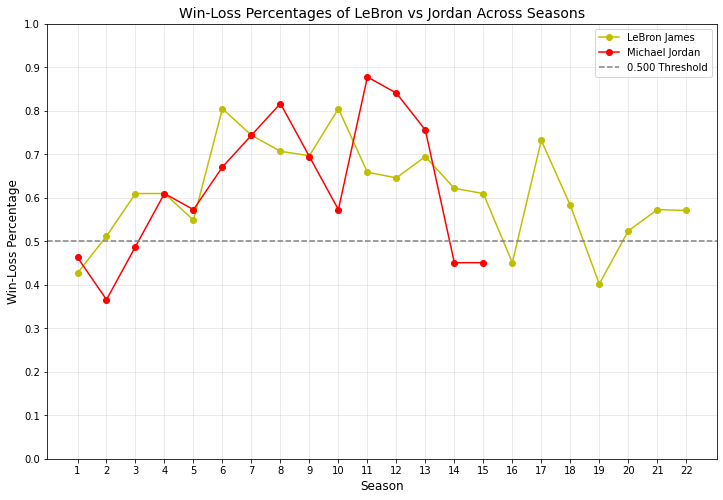

In [21]:
import matplotlib.pyplot as plt

# Extracting W/L% data from the DataFrames
lebron_wl = lebron_team_stats['W/L%'].values  
jordan_wl = jordan_team_stats['W/L%'].values 

# Define number of seasons
lebron_seasons = len(lebron_wl)
jordan_seasons = len(jordan_wl)

# Create x-axis values (season numbers)
lebron_seasons_arr = range(1, lebron_seasons + 1)
jordan_seasons_arr = range(1, jordan_seasons + 1)

plt.figure(figsize=(12, 8))
plt.plot(lebron_seasons_arr, lebron_wl[::-1], label="LeBron James", color='y', marker='o')
plt.plot(jordan_seasons_arr, jordan_wl[::-1], label="Michael Jordan", color='r', marker='o')
plt.axhline(y=0.5, color='gray', linestyle='--', label="0.500 Threshold")
plt.title("Win-Loss Percentages of LeBron vs Jordan Across Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Win-Loss Percentage", fontsize=12)
plt.xticks(range(1, max(lebron_seasons, jordan_seasons) + 1))
plt.yticks([i * 0.1 for i in range(11)])
plt.legend()
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

plt.show()


In [22]:
W_L_Lebron = (lebron_team_stats['W/L%'] < lebron_team_stats['W/L% without Player']).sum()
W_L_Jordan = (jordan_team_stats['W/L%'] < jordan_team_stats['W/L% without Player']).sum()
print(f"Jordan had {W_L_Jordan} seasons (out of 15) where his team had a better win rate when he wasn’t playing. LeBron had {W_L_Lebron} seasons (out of 22) where his team had a better win rate when he wasn’t playing.")

Jordan had 0 seasons (out of 15) where his team had a better win rate when he wasn’t playing. LeBron had 5 seasons (out of 22) where his team had a better win rate when he wasn’t playing.


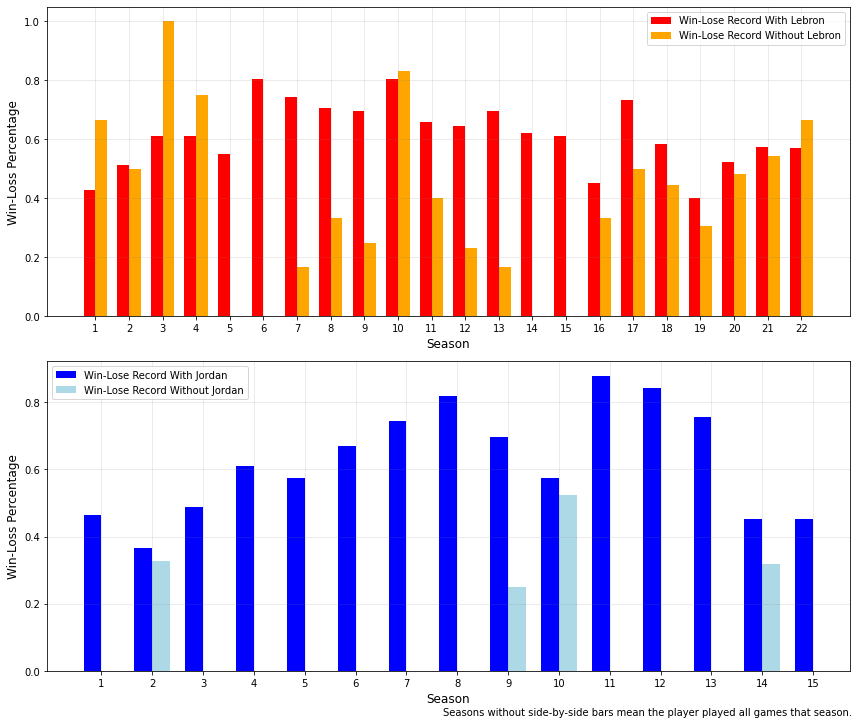

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the data for LeBron and Jordan is in the format mentioned earlier
# LeBron's data: W/L% with player and W/L% without player
lebron_wl_with = lebron_team_stats['W/L%'][::-1].values  
lebron_wl_without = lebron_team_stats['W/L% without Player'][::-1].values  

# Jordan's data: W/L% with player and W/L% without player
jordan_wl_with = jordan_team_stats['W/L%'][::-1].values  
jordan_wl_without = jordan_team_stats['W/L% without Player'][::-1].values  

# Create arrays for the x-axis (seasons)
lebron_seasons_arr = range(1, len(lebron_wl_with) + 1)
jordan_seasons_arr = range(1, len(jordan_wl_with) + 1)

# Set up positions for the bars on the x-axis
bar_width = 0.35
# Adjust the positions to spread the bars more evenly
index_lebron = np.linspace(0, len(lebron_wl_with) - 1, len(lebron_wl_with))  # More evenly spread positions for LeBron
index_jordan = np.linspace(0, len(jordan_wl_with) - 1, len(jordan_wl_with))  # More evenly spread positions for Jordan

# Creating two separate subplots for LeBron and Jordan, arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for LeBron (Side-by-Side Bar Chart)
ax1.bar(index_lebron, lebron_wl_with, bar_width, label="Win-Lose Record With Lebron", color='r')
ax1.bar(index_lebron + bar_width, lebron_wl_without, bar_width, label="Win-Lose Record Without Lebron", color='orange')
ax1.set_xlabel("Season", fontsize=12)
ax1.set_ylabel("Win-Loss Percentage", fontsize=12)
ax1.set_xticks(index_lebron + bar_width / 2)
ax1.set_xticklabels(lebron_seasons_arr)
ax1.legend()
ax1.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Plot for Jordan (Side-by-Side Bar Chart)
ax2.bar(index_jordan, jordan_wl_with, bar_width, label="Win-Lose Record With Jordan", color='b')
ax2.bar(index_jordan + bar_width, jordan_wl_without, bar_width, label="Win-Lose Record Without Jordan", color='lightblue')
ax2.set_xlabel("Season", fontsize=12)
ax2.set_ylabel("Win-Loss Percentage", fontsize=12)
ax2.set_xticks(index_jordan + bar_width / 2)
ax2.set_xticklabels(jordan_seasons_arr)
ax2.legend()
ax2.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Adjust the spacing between the charts
plt.subplots_adjust(hspace=0.2)

# Add annotation to explain the meaning of missing side-by-side bars
fig.text(0.99, 0.00, 'Seasons without side-by-side bars mean the player played all games that season.', ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
# Find out teammate stats their individual and W-L record 
teammates_df = pd.read_excel("data_files/allnba_teammates.xlsx")
teammates_df[['Teammate W', 'Teammate L']] = teammates_df['W-L'].str.split('-', expand=True).astype(int)
teammates_df['Allstar teammate W-L%'] = (teammates_df['Teammate W'] / (teammates_df['Teammate W'] + teammates_df['Teammate L'])).round(3)
teammates_df.drop(columns=['W-L'], inplace=True)
teammates_df.head()

,Player,Season,Age,Team,Lg,Pos,G,GS,MP,FG,...,TRB,AST,STL,BLK,TOV,PF,PTS,Teammate W,Teammate L,Allstar teammate W-L%
0,Scottie Pippen,1987-88,22.0,CHI,NBA,SF,79.0,0.0,20.9,3.3,...,3.8,2.1,1.2,0.7,1.7,2.7,7.9,49,30,0.620
1,Scottie Pippen,1988-89,23.0,CHI,NBA,SF,73.0,56.0,33.1,5.7,...,6.1,3.5,1.9,0.8,2.7,3.6,14.4,43,30,0.589
2,Scottie Pippen,1989-90,24.0,CHI,NBA,SF,82.0,82.0,38.4,6.9,...,6.7,5.4,2.6,1.2,3.4,3.6,16.5,55,27,0.671
3,Scottie Pippen,1990-91,25.0,CHI,NBA,SF,82.0,82.0,36.8,7.3,...,7.3,6.2,2.4,1.1,2.8,3.3,17.8,61,21,0.744
4,Scottie Pippen,1991-92,26.0,CHI,NBA,SF,82.0,82.0,38.6,8.4,...,7.7,7.0,1.9,1.1,3.1,3.0,21.0,67,15,0.817


In [25]:
# Join teammate table to my original w/l table
selected_1 = team_stats[['Season', 'Team','W','L','W with Player','L with Player','W/L%','W/L% without Player']]
selected_2 = teammates_df[['Season','Player','Teammate W','Teammate L','Allstar teammate W-L%']]
combined = pd.merge(selected_1, selected_2, on='Season', how='outer')
combined.head()



,Season,Team,W,L,W with Player,L with Player,W/L%,W/L% without Player,Player,Teammate W,Teammate L,Allstar teammate W-L%
0,2024-25,Los Angeles Lakers,24.0,18.0,22.0,17.0,0.571,0.667,NaN,NaN,NaN,NaN
1,2023-24,Los Angeles Lakers*,47.0,35.0,41.0,30.0,0.573,0.545,Anthony Davis,45.0,31.0,0.592
2,2022-23,Los Angeles Lakers*,43.0,39.0,30.0,25.0,0.524,0.481,Anthony Davis,31.0,25.0,0.554
3,2021-22,Los Angeles Lakers,33.0,49.0,25.0,31.0,0.402,0.308,Anthony Davis,17.0,23.0,0.425
4,2020-21,Los Angeles Lakers*,42.0,30.0,30.0,15.0,0.583,0.444,Anthony Davis,23.0,13.0,0.639


In [26]:
# Add W/L% without allstar Teammate column
combined = combined.dropna(subset=['Teammate W'])
combined['Team W/L% without Teammate'] = ((combined['W'] - combined['Teammate W'])/((combined['L'] - combined['Teammate L'])+(combined['W'] - combined['Teammate W']))).round(3)
combined = combined[combined['Season'] != '1993-94']
combined

,Season,Team,W,L,W with Player,L with Player,W/L%,W/L% without Player,Player,Teammate W,Teammate L,Allstar teammate W-L%,Team W/L% without Teammate
1,2023-24,Los Angeles Lakers*,47.0,35.0,41.0,30.0,0.573,0.545,Anthony Davis,45.0,31.0,0.592,0.333
2,2022-23,Los Angeles Lakers*,43.0,39.0,30.0,25.0,0.524,0.481,Anthony Davis,31.0,25.0,0.554,0.462
3,2021-22,Los Angeles Lakers,33.0,49.0,25.0,31.0,0.402,0.308,Anthony Davis,17.0,23.0,0.425,0.381
4,2020-21,Los Angeles Lakers*,42.0,30.0,30.0,15.0,0.583,0.444,Anthony Davis,23.0,13.0,0.639,0.528
5,2019-20,Los Angeles Lakers*,52.0,19.0,50.0,17.0,0.732,0.500,Anthony Davis,46.0,16.0,0.742,0.667
8,2016-17,Cleveland Cavaliers*,51.0,31.0,51.0,23.0,0.622,NaN,Kyrie Irving,47.0,25.0,0.653,0.400
9,2015-16,Cleveland Cavaliers*,57.0,25.0,56.0,20.0,0.695,0.167,Kyrie Irving,37.0,16.0,0.698,0.690
10,2014-15,Cleveland Cavaliers*,53.0,29.0,50.0,19.0,0.646,0.231,Kyrie Irving,52.0,23.0,0.693,0.143
11,2013-14,Miami Heat*,54.0,28.0,52.0,25.0,0.659,0.400,Dwyane Wade,36.0,18.0,0.667,0.643
12,2012-13,Miami Heat*,66.0,16.0,61.0,15.0,0.805,0.833,Dwyane Wade,55.0,14.0,0.797,0.846


In [27]:
# Separate this table for Lebron and Jordan and find out
#  how many seasons their team performed better without all-nba teammates
lebron_team_stats_2 = combined[:12]
jordan_team_stats_2 = combined[12:]
W_L_Lebron_teammate = (lebron_team_stats_2['W/L%'] < lebron_team_stats_2['W/L% without Teammate']).sum()
W_L_Jordan_teammate = (jordan_team_stats_2['W/L%'] < jordan_team_stats_2['W/L% without Teammate']).sum()
print(f"Jordan all-nba teammate, Pippen had {W_L_Jordan_teammate} seasons (out of 10) where his team had a better win rate when he wasn’t playing. LeBron's all-nba teammates had {W_L_Lebron_teammate} seasons (out of 12) where his team had a better win rate when he wasn’t playing.")


KeyError: 'W/L% without Teammate'

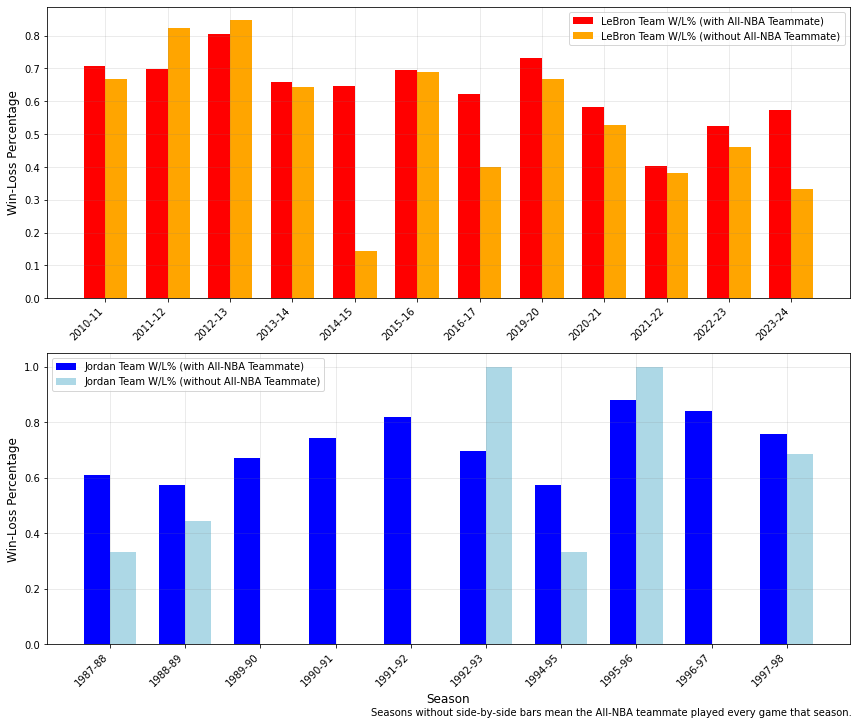

In [ ]:
lebron_team_stats_2 = lebron_team_stats_2[::-1]
jordan_team_stats_2 = jordan_team_stats_2[::-1]

# Set up x-axis labels (seasons) for both players
lebron_seasons = lebron_team_stats_2['Season']
jordan_seasons = jordan_team_stats_2['Season']

# Set bar positions
bar_width = 0.35
index_lebron = np.arange(len(lebron_team_stats_2))
index_jordan = np.arange(len(jordan_team_stats_2))

# Create figure and subplots (2 charts stacked vertically)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# LeBron's chart (W/L% with & without All-NBA teammates)
ax1.bar(index_lebron, lebron_team_stats_2['W/L%'], bar_width, label="LeBron Team W/L% (with All-NBA Teammate)", color='r')
ax1.bar(index_lebron + bar_width, lebron_team_stats_2['W/L% without Teammate'], bar_width, label="LeBron Team W/L% (without All-NBA Teammate)", color='orange')


ax1.set_ylabel('Win-Loss Percentage', fontsize=12)
ax1.set_xticks(index_lebron + bar_width / 2)
ax1.set_xticklabels(lebron_seasons, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Jordan's chart (W/L% with & without All-NBA teammates)
ax2.bar(index_jordan, jordan_team_stats_2['W/L%'], bar_width, label="Jordan Team W/L% (with All-NBA Teammate)", color='b')
ax2.bar(index_jordan + bar_width, jordan_team_stats_2['W/L% without Teammate'], bar_width, label="Jordan Team W/L% (without All-NBA Teammate)", color='lightblue')

ax2.set_xlabel('Season', fontsize=12)
ax2.set_ylabel('Win-Loss Percentage', fontsize=12)
ax2.set_xticks(index_jordan + bar_width / 2)
ax2.set_xticklabels(jordan_seasons, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Adjust spacing and add global note
plt.subplots_adjust(hspace=0.3)
fig.text(0.99, 0.00, 'Seasons without side-by-side bars mean the All-NBA teammate played every game that season.', ha='right', fontsize=10)

# Final layout adjustments
plt.tight_layout()
plt.show()
